In [38]:
# Кравцов Андрей ИУ5-64Б Вариант 10
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import *
%matplotlib inline 
sns.set(style="ticks")
data = pd.read_csv('Youtube_channels.csv', encoding='latin-1', sep=',', decimal=',')
data.head()

,ï»¿rank,youtuber,subscribers,video views,video count,category,started
0,1,T-Series,213000000,"188,073,919,029",16708.0,Music,2006
1,2,YouTube Movies,150000000,"167,122,746,349",NaN,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,133000000,"126,822,520,940",751.0,Education,2006
3,4,SET India,131000000,"101,541,977,714",78334.0,Shows,2006
4,5,Music,116000000,"78,437,871,689",NaN,Music,2013


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ï»¿rank       100 non-null    int64  
 1   youtuber      100 non-null    object 
 2   subscribers   100 non-null    int64  
 3   video views   100 non-null    object 
 4   video count   95 non-null     float64
 5   category      100 non-null    object 
 6   started       100 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 5.6+ KB


In [40]:
#обработка пропусков в данных
round(data.isna().sum()/(data.count()+data.isna().sum()), 2) * 100




ï»¿rank        0.0
youtuber       0.0
subscribers    0.0
video views    0.0
video count    5.0
category       0.0
started        0.0
dtype: float64

In [41]:
#заполняю пропуски в 'video count'
pd.set_option('display.float_format', lambda x: '%.1f' % x)
data['video count '].describe()

count       95.0
mean     15847.2
std      40955.2
min         45.0
25%        393.5
50%       1139.0
75%       4986.0
max     209351.0
Name: video count , dtype: float64

In [42]:
#Mедиана - оптимальная для набора данных с простыми связями между признаками. Не реагирует на выбросы.
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='median')
data['video count '] = imp.fit_transform(data[['video count ']])
data['video count '].describe()

count      100.0
mean     15111.8
std      40037.4
min         45.0
25%        405.2
50%       1139.0
75%       4582.8
max     209351.0
Name: video count , dtype: float64

In [34]:
data.isna().sum()

ï»¿rank         0
youtuber        0
subscribers     0
video views     0
video count     0
category        0
started         0
dtype: int64

In [43]:
#кодирование категориальных признаков
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ï»¿rank       100 non-null    int64  
 1   youtuber      100 non-null    object 
 2   subscribers   100 non-null    int64  
 3   video views   100 non-null    object 
 4   video count   100 non-null    float64
 5   category      100 non-null    object 
 6   started       100 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 5.6+ KB


In [44]:
data = pd.get_dummies(data, columns=['category '])
data.head()

,ï»¿rank,youtuber,subscribers,video views,video count,started,category _Comedy,category _Education,category _Entertainment,category _Film & Animation,category _Gaming,category _How to & Style,category _Music,category _News & Politics,category _Nonprofits & Activism,category _People & Blogs,category _Shows,category _Sports,category _Trailers
0,1,T-Series,213000000,"188,073,919,029",16708.0,2006,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2,YouTube Movies,150000000,"167,122,746,349",1139.0,2015,0,0,0,1,0,0,0,0,0,0,0,0,0
2,3,Cocomelon - Nursery Rhymes,133000000,"126,822,520,940",751.0,2006,0,1,0,0,0,0,0,0,0,0,0,0,0
3,4,SET India,131000000,"101,541,977,714",78334.0,2006,0,0,0,0,0,0,0,0,0,0,1,0,0
4,5,Music,116000000,"78,437,871,689",1139.0,2013,0,0,0,0,0,0,1,0,0,0,0,0,0


<AxesSubplot:xlabel='video count ', ylabel='Count'>

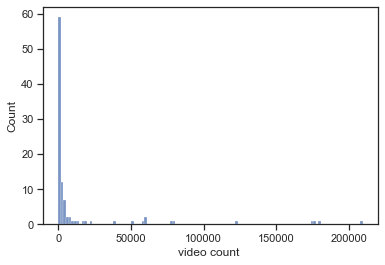

In [52]:
sns.histplot(data['video count '])

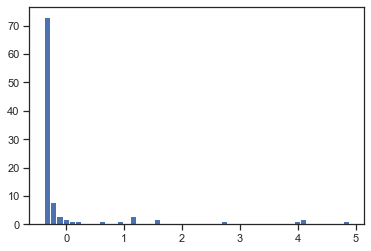

In [54]:
#масштабирование данных
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
sc = StandardScaler()
sc_data = sc.fit_transform(data[['video count ']])
plt.hist(sc_data, 50)
plt.show()

<AxesSubplot:xlabel='subscribers ', ylabel='Count'>

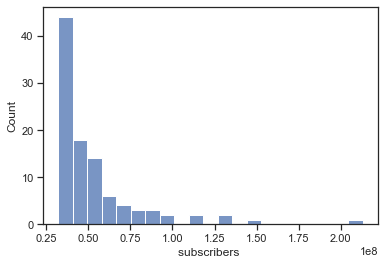

In [56]:
sns.histplot(data['subscribers '])

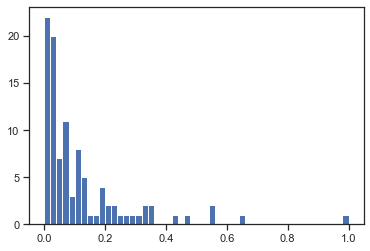

In [49]:
sc2 = MinMaxScaler()
sc2_data = sc2.fit_transform(data[['subscribers ']])
plt.hist(sc2_data, 50)
plt.show()